In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import glob
import os
import cv2 as cv
import numpy as np

def load_data(path):
    data=[]
    label=[]
    files=glob.glob(path+'/DATA')
    file_inside=os.listdir(files[0])
    for f in file_inside:
        image_folder=os.path.join(files[0],f)
        image_paths=os.listdir(image_folder)
        for image in image_paths:
            image_path=os.path.join(image_folder,image)
            img=cv.imread(image_path)
            resized=cv.resize(img,(240,240))
            image = cv.cvtColor(resized, cv.COLOR_BGR2RGB)
            image_array = np.array(image)
            
            data.append(image_array)
            label.append([int(f)])
    return data,label
        
        
dataset,label=load_data('/kaggle/input/traffic-data')

In [2]:
import numpy as np

_dataset=np.array(dataset)
_label=np.array(label)

permutation = np.random.permutation(len(_dataset))
shuffled_dataset = _dataset[permutation]
shuffled_label = _label[permutation]

In [3]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(shuffled_dataset,shuffled_label,test_size=0.25,random_state=0)

In [4]:
x_train=x_train/255
x_test=x_test/255

In [5]:
import matplotlib.pyplot as plt


def plotting_loss(result):
    loss=result.history['loss']
    val_loss=result.history['val_loss']
    epochs=range(1,len(loss)+1)
    plt.plot(epochs,loss,'y',label='Training loss')
    plt.plot(epochs,val_loss,'r',label='validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.legend()
    plt.show()

In [6]:
from keras.layers import Conv2D,MaxPool2D,Dense,Activation,Flatten,Dropout
import tensorflow as tf
model1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (5, 5),padding="same",activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(216, activation='relu'),
    
    tf.keras.layers.Dense(58,activation='softmax'),
])

model1.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

result1=model1.fit(x_train,y_train,batch_size=32,validation_data=(x_test,y_test),epochs=10,verbose=2)

2024-04-16 07:55:58.277590: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-16 07:55:58.277707: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-16 07:55:58.538386: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Epoch 1/10


I0000 00:00:1713254196.687063      87 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1713254196.705279      87 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1713254213.748065      86 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


98/98 - 35s - 357ms/step - accuracy: 0.4666 - loss: 6.2739 - val_accuracy: 0.7833 - val_loss: 0.8979
Epoch 2/10
98/98 - 9s - 96ms/step - accuracy: 0.8804 - loss: 0.4692 - val_accuracy: 0.9291 - val_loss: 0.2843
Epoch 3/10
98/98 - 9s - 96ms/step - accuracy: 0.9680 - loss: 0.1256 - val_accuracy: 0.9530 - val_loss: 0.1823
Epoch 4/10
98/98 - 9s - 96ms/step - accuracy: 0.9949 - loss: 0.0317 - val_accuracy: 0.9645 - val_loss: 0.1525
Epoch 5/10
98/98 - 9s - 96ms/step - accuracy: 0.9981 - loss: 0.0143 - val_accuracy: 0.9732 - val_loss: 0.1213
Epoch 6/10
98/98 - 10s - 97ms/step - accuracy: 0.9990 - loss: 0.0059 - val_accuracy: 0.9636 - val_loss: 0.1456
Epoch 7/10
98/98 - 10s - 104ms/step - accuracy: 0.9987 - loss: 0.0090 - val_accuracy: 0.9712 - val_loss: 0.1473
Epoch 8/10
98/98 - 10s - 98ms/step - accuracy: 1.0000 - loss: 0.0016 - val_accuracy: 0.9732 - val_loss: 0.1386
Epoch 9/10
98/98 - 10s - 98ms/step - accuracy: 1.0000 - loss: 9.0831e-04 - val_accuracy: 0.9751 - val_loss: 0.1430
Epoch 10/1

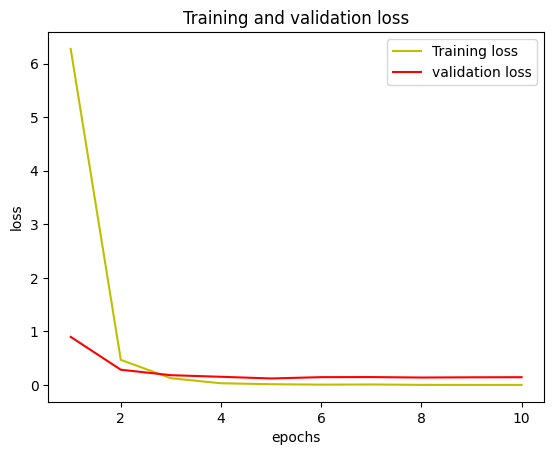

In [7]:
plotting_loss(result1)

In [8]:
from keras.layers import Conv2D,MaxPool2D,Dense,Activation,Flatten,Dropout
import tensorflow as tf
model2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3),padding="same", activation='relu', input_shape=(240,240, 3)),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(64, (5, 5),padding="same",activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(216, activation='relu'),
    
    tf.keras.layers.Dense(58,activation='softmax'),
])

model2.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

result2=model2.fit(x_train,y_train,batch_size=32,validation_data=(x_test,y_test),epochs=10,verbose=2)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/10
98/98 - 33s - 334ms/step - accuracy: 0.4055 - loss: 3.1253 - val_accuracy: 0.7325 - val_loss: 1.0493
Epoch 2/10
98/98 - 7s - 67ms/step - accuracy: 0.8414 - loss: 0.5955 - val_accuracy: 0.9022 - val_loss: 0.4078
Epoch 3/10
98/98 - 7s - 66ms/step - accuracy: 0.9674 - loss: 0.1350 - val_accuracy: 0.9195 - val_loss: 0.2475
Epoch 4/10
98/98 - 7s - 66ms/step - accuracy: 0.9846 - loss: 0.0596 - val_accuracy: 0.9645 - val_loss: 0.1893
Epoch 5/10
98/98 - 6s - 66ms/step - accuracy: 0.9923 - loss: 0.0446 - val_accuracy: 0.9626 - val_loss: 0.1610
Epoch 6/10
98/98 - 7s - 66ms/step - accuracy: 0.9910 - loss: 0.0426 - val_accuracy: 0.9674 - val_loss: 0.1800
Epoch 7/10
98/98 - 6s - 66ms/step - accuracy: 0.9994 - loss: 0.0071 - val_accuracy: 0.9732 - val_loss: 0.1291
Epoch 8/10
98/98 - 6s - 66ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 0.9732 - val_loss: 0.1300
Epoch 9/10
98/98 - 6s - 66ms/step - accuracy: 1.0000 - loss: 6.2355e-04 - val_accuracy: 0.9789 - val_loss: 0.1321
Epoc

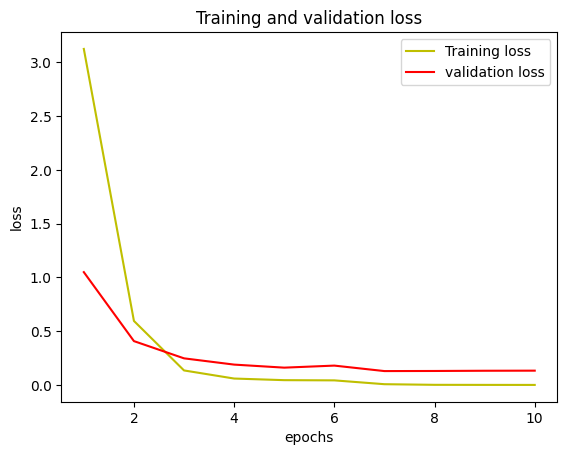

In [9]:
plotting_loss(result2)

In [10]:
#run the code with random split 42,60
from keras.layers import Conv2D,MaxPool2D,Dense,Activation,Flatten,Dropout
import tensorflow as tf
model3 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3),padding="same", activation='relu', input_shape=(240,240, 3)),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(64, (5, 5),padding="same",activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Conv2D(128, (5, 5),padding="same",activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(216, activation='relu'),
    
    tf.keras.layers.Dense(58,activation='softmax'),
])

model3.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

result3=model3.fit(x_train,y_train,batch_size=32,validation_data=(x_test,y_test),epochs=10,verbose=2)

Epoch 1/10


W0000 00:00:1713254549.513331      89 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1713254571.526314      88 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


98/98 - 34s - 348ms/step - accuracy: 0.2747 - loss: 3.0103 - val_accuracy: 0.4784 - val_loss: 2.0978
Epoch 2/10
98/98 - 7s - 76ms/step - accuracy: 0.5955 - loss: 1.5782 - val_accuracy: 0.7287 - val_loss: 1.0552
Epoch 3/10
98/98 - 7s - 76ms/step - accuracy: 0.8088 - loss: 0.6938 - val_accuracy: 0.8725 - val_loss: 0.5481
Epoch 4/10
98/98 - 7s - 76ms/step - accuracy: 0.9053 - loss: 0.3309 - val_accuracy: 0.9310 - val_loss: 0.2901
Epoch 5/10
98/98 - 7s - 76ms/step - accuracy: 0.9539 - loss: 0.1760 - val_accuracy: 0.9271 - val_loss: 0.3096
Epoch 6/10
98/98 - 7s - 76ms/step - accuracy: 0.9536 - loss: 0.1599 - val_accuracy: 0.9607 - val_loss: 0.1666
Epoch 7/10
98/98 - 7s - 76ms/step - accuracy: 0.9799 - loss: 0.0742 - val_accuracy: 0.9645 - val_loss: 0.1457
Epoch 8/10
98/98 - 7s - 76ms/step - accuracy: 0.9840 - loss: 0.0574 - val_accuracy: 0.9664 - val_loss: 0.1555
Epoch 9/10
98/98 - 7s - 76ms/step - accuracy: 0.9818 - loss: 0.0484 - val_accuracy: 0.9655 - val_loss: 0.1796
Epoch 10/10
98/98 -

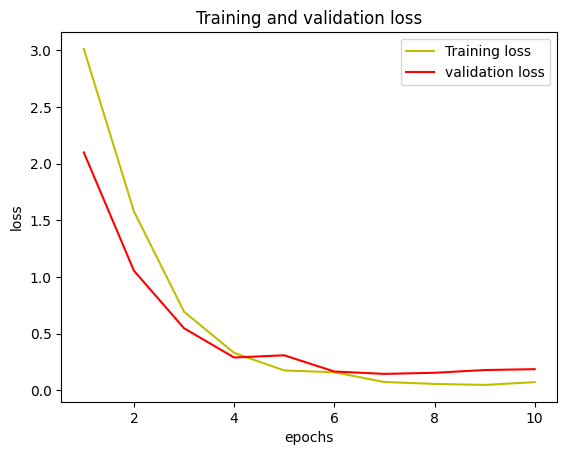

In [11]:
plotting_loss(result3)

In [13]:
from keras.layers import Conv2D,MaxPool2D,Dense,Activation,Flatten,Dropout
import tensorflow as tf
model3 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3),padding="same", activation='relu', input_shape=(240,240, 3)),
    tf.keras.layers.Conv2D(32, (3, 3),padding="same",activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, (5, 5),padding="same",activation='relu'),
    tf.keras.layers.Conv2D(64, (5, 5),padding="same",activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(128, (5, 5),padding="same",activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    
    tf.keras.layers.Dense(58,activation='softmax'),
])

model3.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

result3=model3.fit(x_train,y_train,batch_size=32,validation_data=(x_test,y_test),epochs=10,verbose=2)



Epoch 1/10
98/98 - 35s - 359ms/step - accuracy: 0.2210 - loss: 3.2675 - val_accuracy: 0.5781 - val_loss: 1.8668
Epoch 2/10
98/98 - 15s - 158ms/step - accuracy: 0.7365 - loss: 1.0359 - val_accuracy: 0.8734 - val_loss: 0.5378
Epoch 3/10
98/98 - 15s - 158ms/step - accuracy: 0.9111 - loss: 0.3295 - val_accuracy: 0.9128 - val_loss: 0.3140
Epoch 4/10
98/98 - 15s - 156ms/step - accuracy: 0.9591 - loss: 0.1580 - val_accuracy: 0.9444 - val_loss: 0.2341
Epoch 5/10
98/98 - 15s - 155ms/step - accuracy: 0.9722 - loss: 0.0845 - val_accuracy: 0.9684 - val_loss: 0.1559
Epoch 6/10
98/98 - 15s - 155ms/step - accuracy: 0.9882 - loss: 0.0379 - val_accuracy: 0.9808 - val_loss: 0.1757
Epoch 7/10
98/98 - 15s - 156ms/step - accuracy: 0.9859 - loss: 0.0557 - val_accuracy: 0.9770 - val_loss: 0.1631
Epoch 8/10
98/98 - 15s - 156ms/step - accuracy: 0.9939 - loss: 0.0261 - val_accuracy: 0.9866 - val_loss: 0.1199
Epoch 9/10
98/98 - 15s - 156ms/step - accuracy: 0.9987 - loss: 0.0063 - val_accuracy: 0.9827 - val_loss:

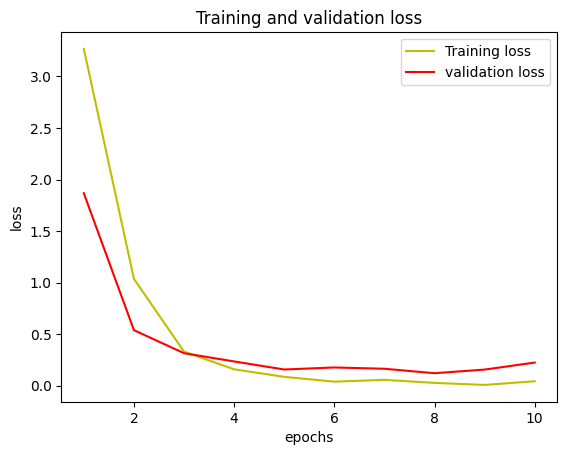

In [14]:
plotting_loss(result3)